In [26]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

np.set_printoptions(precision=2, suppress=True)

Segmentation masks:

0: background

1: tool

2: ILM

3: RPE


In [27]:
masks_path = '/home/demir/Desktop/jhu_project/oct-depth-control/data/may21-1/masks_machine'
masks = []
for mask_img in os.listdir(masks_path):
    mask = cv2.imread(os.path.join(masks_path, mask_img), cv2.IMREAD_GRAYSCALE)
    masks.append(mask)

[0 1 2 3]


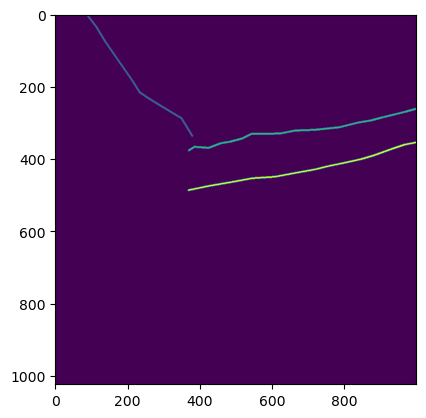

In [28]:
test_img = cv2.imread('/home/demir/Desktop/jhu_project/oct-depth-control/data/may21-1/masks_machine/volume_0_slice_2.png', cv2.IMREAD_GRAYSCALE)
print(np.unique(test_img))
filtered_img = (test_img == 1).astype(int)
plt.imshow(test_img)

In [43]:
def find_lowest(image, value):
    rows = image.shape[0]
    for i in range(rows-1, -1, -1):
        if value in image[i]:
            col_index = np.where(image[i] == 1)[0][0]
            return (col_index, i)
    return None

def find_layers(image, needle_tip_col):
    try:
        ilm_row = np.where(image[:, needle_tip_col] == 2)[0][0]
        rpe_row = np.where(image[:, needle_tip_col] == 3)[0][0]
        return needle_tip_col, ilm_row, rpe_row
    except IndexError:
        print('ILM or RPE not visible under needle tip')
        return find_layers(image, needle_tip_col + 1)
    

def normalized_pos_between_layers(ilm_row, rpe_row, needle_tip_row):
    if needle_tip_row < ilm_row:
        print('needle tip is above ILM')
        return 0
    elif needle_tip_row > rpe_row:
        print('needle tip is below RPE')
        return 1
    return (needle_tip_row - ilm_row) / (rpe_row - ilm_row)


In [30]:
needle_tip_col, needle_tip_row = find_lowest(test_img, 1)
ilm_row, rpe_row = find_layers(test_img, needle_tip_col)

print('needle tip: ', needle_tip_col, needle_tip_row)
print('ilm: ', needle_tip_col, ilm_row)
print('rpe: ', needle_tip_col, rpe_row)

print(normalized_pos_between_layers(ilm_row, rpe_row, needle_tip_row))

needle tip:  380 339
ilm:  380 368
rpe:  380 483
needle tip is above ILM
0


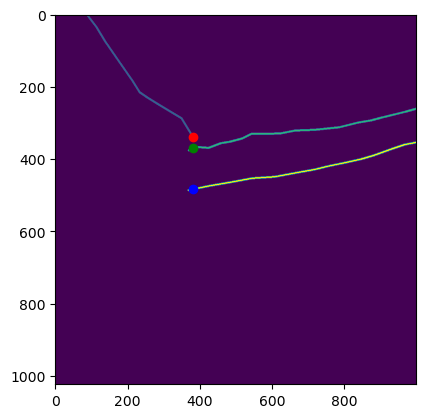

In [31]:
plt.imshow(test_img)
plt.scatter(needle_tip_col, needle_tip_row, c='r')
plt.scatter(needle_tip_col, ilm_row, c='g')
plt.scatter(needle_tip_col, rpe_row, c='b')

needle tip:  384 347
ilm:  384 424
rpe:  384 528
needle tip is above ILM
0


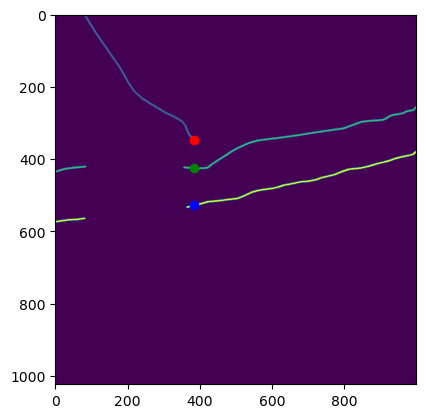

needle tip:  506 593
ilm:  506 491
rpe:  506 562
needle tip is below RPE
1


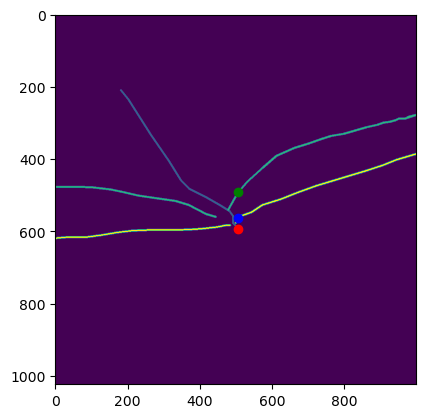

needle tip:  420 510
ilm:  420 533
rpe:  420 565
needle tip is above ILM
0


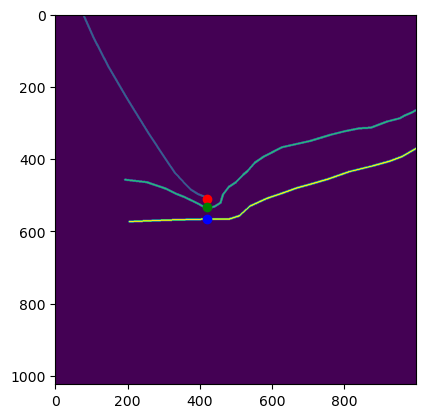

ILM or RPE not visible under needle tip
ILM or RPE not visible under needle tip
ILM or RPE not visible under needle tip
needle tip:  483 563
ilm:  483 445
rpe:  483 554
needle tip is below RPE
1


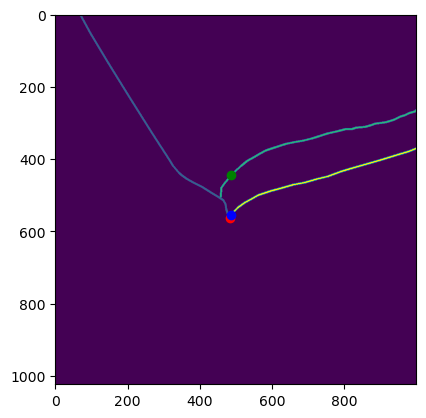

needle tip:  540 658
ilm:  540 528
rpe:  540 610
needle tip is below RPE
1


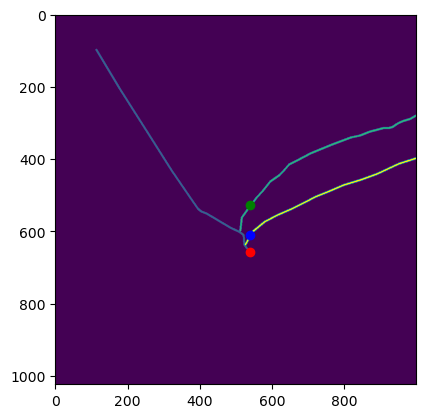

In [46]:
i = 0
for mask in masks:

    needle_tip_col, needle_tip_row = find_lowest(mask, 1)
    layers_col, ilm_row, rpe_row = find_layers(mask, needle_tip_col)

    print('needle tip: ', needle_tip_col, needle_tip_row)
    print('ilm: ', needle_tip_col, ilm_row)
    print('rpe: ', needle_tip_col, rpe_row)

    plt.imshow(mask)
    plt.scatter(needle_tip_col, needle_tip_row, c='r')
    plt.scatter(layers_col, ilm_row, c='g')
    plt.scatter(layers_col, rpe_row, c='b')

    print(normalized_pos_between_layers(ilm_row, rpe_row, needle_tip_row))
    plt.show()
    i += 1
    if i == 5:
        break

In [2]:
def draw_circle(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(img, (x, y), 5, (0, 255, 0), -1)
        cv2.imshow('Image', img)

img_path = '/home/demir/Desktop/jhu_project/oct-depth-control/data/may21-1/img/volume_0_slice_2.jpg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

cv2.namedWindow('Image')
cv2.setMouseCallback('Image', draw_circle)

cv2.imshow('Image', img)
key = cv2.waitKey(0)

if key == 27: # escape key
    cv2.destroyAllWindows()